In [6]:
import io
import os
import sys
from importlib import reload 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import requests
from astropy.io.votable import parse

# from astropy.io.votable import parse_single_table

In [1]:
import ska
import ska.tools as skatools

In [5]:
sun = ska.Spectrum()
sun.from_csv('sun.csv')
sun.Wavelength#.dtype

dtype('float64')

In [8]:
sun = ska.Spectrum('ceres.csv')
sun.Wavelength#.dtype

array([0.435 , 0.4375, 0.44  , 0.4425, 0.445 , 0.4475, 0.45  , 0.4525,
       0.455 , 0.4575, 0.46  , 0.4625, 0.465 , 0.4675, 0.47  , 0.4725,
       0.475 , 0.4775, 0.48  , 0.4825, 0.485 , 0.4875, 0.49  , 0.4925,
       0.495 , 0.4975, 0.5   , 0.5025, 0.505 , 0.5075, 0.51  , 0.5125,
       0.515 , 0.5175, 0.52  , 0.5225, 0.525 , 0.5275, 0.53  , 0.5325,
       0.535 , 0.5375, 0.54  , 0.5425, 0.545 , 0.5475, 0.55  , 0.5525,
       0.555 , 0.5575, 0.56  , 0.5625, 0.565 , 0.5675, 0.57  , 0.5725,
       0.575 , 0.5775, 0.58  , 0.5825, 0.585 , 0.5875, 0.59  , 0.5925,
       0.595 , 0.5975, 0.6   , 0.6025, 0.605 , 0.6075, 0.61  , 0.6125,
       0.615 , 0.6175, 0.62  , 0.6225, 0.625 , 0.6275, 0.63  , 0.6325,
       0.635 , 0.6375, 0.64  , 0.6425, 0.645 , 0.6475, 0.65  , 0.6525,
       0.655 , 0.6575, 0.66  , 0.6625, 0.665 , 0.6675, 0.67  , 0.6725,
       0.675 , 0.6775, 0.68  , 0.6825, 0.685 , 0.6875, 0.69  , 0.6925,
       0.695 , 0.6975, 0.7   , 0.7025, 0.705 , 0.7075, 0.71  , 0.7125,
      

In [9]:
sun.Wavelength

array([0.435 , 0.4375, 0.44  , 0.4425, 0.445 , 0.4475, 0.45  , 0.4525,
       0.455 , 0.4575, 0.46  , 0.4625, 0.465 , 0.4675, 0.47  , 0.4725,
       0.475 , 0.4775, 0.48  , 0.4825, 0.485 , 0.4875, 0.49  , 0.4925,
       0.495 , 0.4975, 0.5   , 0.5025, 0.505 , 0.5075, 0.51  , 0.5125,
       0.515 , 0.5175, 0.52  , 0.5225, 0.525 , 0.5275, 0.53  , 0.5325,
       0.535 , 0.5375, 0.54  , 0.5425, 0.545 , 0.5475, 0.55  , 0.5525,
       0.555 , 0.5575, 0.56  , 0.5625, 0.565 , 0.5675, 0.57  , 0.5725,
       0.575 , 0.5775, 0.58  , 0.5825, 0.585 , 0.5875, 0.59  , 0.5925,
       0.595 , 0.5975, 0.6   , 0.6025, 0.605 , 0.6075, 0.61  , 0.6125,
       0.615 , 0.6175, 0.62  , 0.6225, 0.625 , 0.6275, 0.63  , 0.6325,
       0.635 , 0.6375, 0.64  , 0.6425, 0.645 , 0.6475, 0.65  , 0.6525,
       0.655 , 0.6575, 0.66  , 0.6625, 0.665 , 0.6675, 0.67  , 0.6725,
       0.675 , 0.6775, 0.68  , 0.6825, 0.685 , 0.6875, 0.69  , 0.6925,
       0.695 , 0.6975, 0.7   , 0.7025, 0.705 , 0.7075, 0.71  , 0.7125,
      

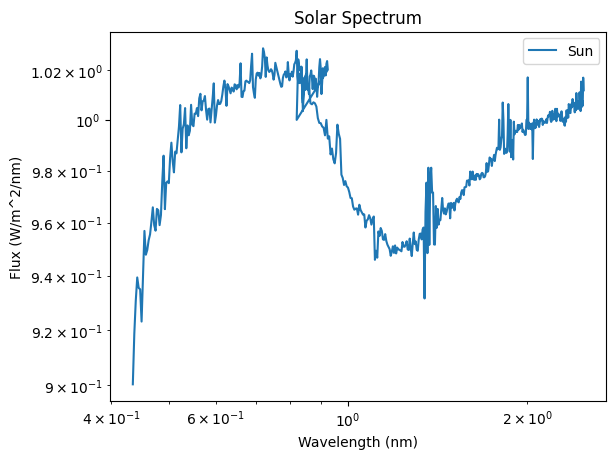

In [10]:
fig, ax = plt.subplots()


ax.plot(sun.Wavelength, sun.Flux, label='Sun')

# ax.plot( H.wave, H.trans, label='H')
# ax.plot( K.wave, K.trans, label='H')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
sun = pd.read_csv(ska.PATH_SUN)
# sun.Wavelength /= 10000
sun.head(5)


In [11]:
V = ska.Filter('Generic/Johnson.V')
H = ska.Filter('Paranal/VISTA.H')
K = ska.Filter('Paranal/VISTA.Ks')
J = ska.Filter('2MASS/2MASS.J')

In [ ]:
fig, ax = plt.subplots()


ax.plot(sun.Wavelength, sun.Flux, label='Sun')

ax.plot( H.wave, H.trans, label='H')
ax.plot( K.wave, K.trans, label='H')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [12]:
H.compute_flux( sun ),  V.compute_flux( sun )

(0.9775131455261331, 0.9989707674492199)

In [ ]:
        # Main SVO filter list
        r = requests.get(
            "https://svo.cab.inta-csic.es/files/svo/Public/HowTo/FPS/FPS_info.xml"
        )
        SVOFilters = parse(io.BytesIO(r.content))
        main_id = SVOFilters.get_first_table().to_table().to_pandas().filterID.to_list()
        
        # Secondary SVO filter list
        r = requests.get(
            "https://svo.cab.inta-csic.es/files/svo/Public/HowTo/FPS/others.xml"
        )
        SVOFilters = parse(io.BytesIO(r.content))
        other_id = SVOFilters.get_first_table().to_table().to_pandas()['__ID'].to_list()

        # Merge and Write to disk
        filter_id = main_id + other_id
        with open(ska.PATH_FILTER_LIST, "w") as file:
            for f in filter_id:
                file.write(f"{f}\n")


In [ ]:
main_info.filterID.to_list()
other_info.filterID.to_list()

filter_info = main_info.filterID.to_list() + other_info.filterID.to_list()

print(len(filter_info), len(main_info), len(other_info))
filter_info

In [ ]:
skatools.compute_color( sun, V, H, phot_sys='AB')

In [ ]:
skatools.compute_color( sun, V, H, phot_sys='Vega')

In [ ]:
df = pd.read_fwf('a000001.sp41.txt', header=None)
df.columns = ['wave', 'reflec', 'unc', 'flag']

In [ ]:
df

In [ ]:
df.to_csv('ceres.csv', index=False)